In [98]:
#Import packages
import pandas as pd
import numpy as np
import random
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import matplotlib.transforms as tr
import scipy.misc
from scipy import ndimage
import os
import time

In [99]:
#Function to load images from a folder
def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        img = mpimg.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

In [132]:
#Loading images
images=load_images('leaf_data')

In [101]:
print("Number of Images :",len(images))

Number of Images : 6


Showing 2 different images :


<IPython.core.display.Javascript object>


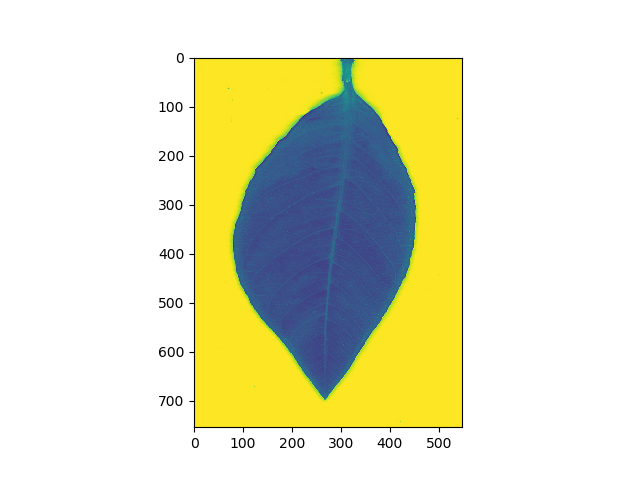

In [130]:
#Showing the images
print("Showing 2 different images :")
plt.imshow(images[1])
plt.show()
imgs=[]

In [104]:
#Initializing stores which stores the signatures to 0

stores=[]
for i in range(len(images)):
    stores.append(np.zeros((images[i].shape[0]-2,images[i].shape[1]-2)))
print(len(stores))


6


In [108]:
#Creating shingles for each image and storing it in list stores
st=time.time()
print(len(images))
for k in range(len(images)):
    print("Creating Shingle for Image :",k+1)
    for i in range(images[k].shape[0]-2):
        for j in range(images[k].shape[1]-2):
            sl=images[k][i:i+3,j:j+3]
            #print(sl)
            stores[k][i][j]=np.sum(sl)
en=time.time()
print("Time taken =" ,(en-st),"s")

6
Creating Shingle for Image : 1
Creating Shingle for Image : 2
Creating Shingle for Image : 3
Creating Shingle for Image : 4
Creating Shingle for Image : 5
Creating Shingle for Image : 6
Time taken = 24.791253328323364 s


In [110]:
#Setting the length of signature to 20
siglen=100
sig=np.full((len(images),1,siglen),100000000)

In [111]:
#Generating hash function
m=3119
hashfunc=[]
while len(hashfunc)<siglen:
    a=random.randint(1,2000)
    b=random.randint(1,2000)
    if [a,b] not in hashfunc:
        hashfunc.append([a,b])

In [112]:
print(hashfunc)

[[1920, 620], [1520, 1156], [1594, 1476], [526, 282], [621, 963], [1509, 1165], [1548, 1757], [511, 937], [1038, 1895], [1106, 590], [1343, 1444], [303, 904], [1887, 1324], [1565, 1920], [68, 1175], [1982, 851], [798, 195], [402, 215], [1386, 908], [563, 935], [513, 956], [1168, 660], [722, 1245], [1775, 1389], [1700, 51], [1732, 1508], [530, 894], [210, 1009], [549, 1896], [378, 1388], [1035, 1694], [217, 1405], [1958, 1856], [1252, 1260], [1353, 311], [526, 376], [1217, 393], [300, 1791], [784, 1050], [560, 1977], [440, 132], [400, 404], [1713, 763], [1105, 510], [821, 1413], [540, 1310], [726, 1973], [530, 422], [1956, 664], [728, 197], [693, 1833], [512, 1442], [639, 1501], [462, 178], [862, 317], [1192, 1730], [1170, 176], [1793, 1319], [1357, 77], [934, 1499], [1220, 1055], [908, 542], [1397, 962], [1527, 1186], [256, 847], [274, 1265], [1082, 1581], [1206, 83], [1438, 827], [125, 306], [1993, 1614], [1131, 1354], [1427, 1461], [571, 1131], [847, 1206], [888, 1389], [682, 515], [

In [113]:
#Generating signatures
st=time.time()
for k in range(len(images)):
    print("Generating signature for Image:", k+1)
    for i in stores[k].flat:
        for j in range(len(hashfunc)):   
            hashvalue=(hashfunc[j][0]*i+hashfunc[j][1])%m
            sig[k][0][j]=min(sig[k][0][j],hashvalue)
en=time.time()
print("Time taken to Generate Signatures :",en-st,"s")

Generating signature for Image: 1
Generating signature for Image: 2
Generating signature for Image: 3
Generating signature for Image: 4
Generating signature for Image: 5
Generating signature for Image: 6
Time taken to Generate Signatures : 1010.2813990116119 s


In [114]:
print("Printing all the signatures :")
for i in range(len(images)):
    print("Signature ",i," :",sig[i])

Printing all the signatures :
Signature  0  : [[  39  826  119  334  512  717  130  591  195  473  188  473  240  507
   543 1379   96  415  398 1299   41  464 1601  120 2801  318  834  525
    96  192   53  380  237  632  116  428  349  654   59  378 2495  153
  1383  662  204   47  171  362 1443  435  595  619  562    8 1161  590
   941  452 1630   24   93  176   76  385 1995   35  609   66  305  233
   158  534  428  298  386  145  618  153  394  282  208  474  684  452
   105   60  634 1711  438  168  313  468  436   16  318   99   71  592
   230  336]]
Signature  1  : [[ 2  1  2  0  3  3  1  0  0  2  0  0  3  1  3  0  0  0  0  4  0  0 12  0
   0  1  0  2  0  0  6  0  1  0  0  2  2  0  1  2  0  1  1  0  2  0  2  0
   0  0  0  1  2  8  3  0  0  1  0  1  3  0  0  0  3  1  3 11  0  0  0  4
   0  3  1  0  0  1  2  0  0  1  2  1  1  5  1  7  2 11  2  0  2  4  2  1
   1  0  0  1]]
Signature  2  : [[  39  826  119  334  512  717  130  591  195  473  188  473  240  507
   543 1379   96  41

In [127]:
#Creating groups
#Setting Threshold to 80%
Threshold=80
count=len(images)
groups=[]
checked=[False for i in range(len(images))]
while count>0:
    for i in range(len(images)):
        if checked[i]==False:
            checked[i]=True
            count=count-1
            grp=[]
            grp.append(i)
            for j in range(i+1,len(images),1):
                truth=(sig[i]==sig[j])
                value=0
                for val in truth.flat:
                    if val==True:
                        value=value+1
                if value>=Threshold:
                    grp.append(j)
                    checked[j]=True
                    count=count-1
            groups.append(grp)

In [128]:
#Printing Groups of similar images
for i in range(len(groups)):
    print(groups[i])

[0, 2, 3]
[1, 4, 5]
